# Downsampling example

This example demonstrates the use of `rlmtp`'s downsampler for individual tests.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import rlmtp

In [2]:
# Specify the directory with the data
data_dir = './'
# Specify the directory where you would want to save downsampled data
output_dir = 'output'

In [3]:
# Import the data (must contain the columns: e_true, Sigma_true, Time[s])
cols_to_keep = ['e_true', 'Sigma_true', 'Time[s]']
# Here the data is put in a list to suggest the case where you have several tests to be
# downsampled at the same time. This can be done easily using the os.listdir function.
data_files = ['HEM320C-LP8_Specimen_1_processed_data.csv']
orig_data = [pd.read_csv(os.path.join(data_dir, f)) for f in data_files]

# Specify some properties for the downsampler
# Most of the parameters are left as their default values
# tol is the target relative error in strain energy between the original data and the downsampled data
# Note that we will use the "global error method" in the downsampler (use_local_error=False)
tol = 0.005
# f_yn is the nominal yield stress of the material
f_yn = 355.0

# Run the downsampler
ds_data = []
for i, d in enumerate(orig_data):
    print('Downsampling {0}...'.format(data_files[i]))
    ind = rlmtp.rlmtp_downsampler(d, use_local_error=False, downsample_tol=tol, f_yn=f_yn)
    # Only keep the selected columns for the sampled points
    ds_data.append(d.loc[ind, cols_to_keep])

Downsampling HEM320C-LP8_Specimen_1_processed_data.csv...
Current error = 15.60%, # points = 12, current tol = 1.000e-01
Current error = 1.13%, # points = 55, current tol = 3.053e-03
Current error = 0.54%, # points = 79, current tol = 1.283e-03
Current error = 0.54%, # points = 86, current tol = 1.129e-03
Current error = 0.47%, # points = 98, current tol = 1.001e-03
Current error = 0.50%, # points = 93, current tol = 1.041e-03


Given the above results (Current error = 0.50%, # points = 93, current tol = 1.041e-03), this is essentially the same as using the local error method with tol = 0.001 (the default value for the local method).

In [4]:
# Display the first 20 points from the downsampled data
# Notice that the index denotes the sampled points
ds_data[0].iloc[:20, :]

,e_true,Sigma_true,Time[s]
0,0.000005,0.513109,0.100024
117,0.000222,46.993468,7.100006
210,0.000434,93.549303,11.750031
303,0.000648,140.107994,16.400056
395,0.000863,186.158079,21.000069
615,0.001080,232.661840,32.000041
634,0.001299,280.495207,32.950026
650,0.001535,325.771949,33.750098
666,0.001824,359.161347,34.550047
688,0.002190,375.265361,35.650068


/Users/ahartloper/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ahartloper/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ahartloper/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


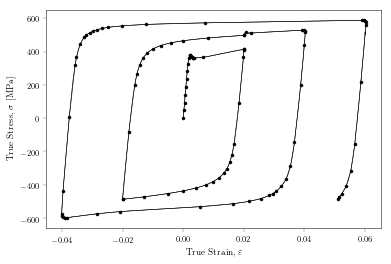

In [5]:
# Plot the sampled and original data
# The dots are the sampled points and the line is the original data
for i, d in enumerate(orig_data):
    ind = ds_data[i].index
    plt.figure()
    plt.plot(d['e_true'], d['Sigma_true'], c='k')
    plt.plot(ds_data[i]['e_true'], ds_data[i]['Sigma_true'], c='k', marker='o')
    plt.xlabel(r'True Strain, $\varepsilon$')
    plt.ylabel(r'True Stress, $\sigma$ [MPa]')
    plt.show()

In [6]:
# Finally, the downsampled data can be saved by uncommenting the last command below
for i, d in enumerate(ds_data):
    name = data_files[i][:-4] + '_downsampled.csv'
    out_path = os.path.join(output_dir, name)
    # d.to_csv(out_path)